# Water age in the Terminos lagoon. Mexico

 Jose-Gilberto Cardoso-Mohedano<sup>2,*</sup>, 
 
Lalo
Marisol
María-Eugenia Allende-Arandía 

Carlos 
 
 Joan Albert Sanchez-Cabeza<sup>3</sup>,
 
Ana Carolina Ruiz-Fernández<sup> 3 </sup>, 



<sup> 1 </sup> Posgrado en Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México; Avenida Ciudad Universitaria 3000, C.P. 04510, Coyoacán, Ciudad de México, México

<sup> 2 </sup>  Estación el Carmen, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Carretera Carmen-Puerto Real km. 9.5, 24157 Ciudad del Carmen, Campeche, México

<sup> 3 </sup>  Unidad Académica Mazatlán, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Calzada Joel Montes Camarena s/n, Colonia Playa Sur, Mazatlán 82000, Sinaloa, México



 \*Corresponding Author: gcardoso@cmarl.unam.mx Phone:+52-938-38-31847

[doi:XXXXX](https://XXXX)

## This scrips plot the interannual flow variability of the Candelaria and Palizada rivers

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date, timedelta

In [2]:
# this function is used to make the graphs look pretty


def make_pretty_graphs():
    plt.rcParams["xtick.labelsize"] = 18
    plt.rcParams["ytick.labelsize"] = 18
    sns.set_style("ticks")
    sns.despine(top=False, right=False)

### Read flow of the Candelaria Palizada data  

In [3]:
# To read in the csv file


def read_csv_file(filename):
    # Read in the csv file
    df = pd.read_csv(filename, sep=",", header=0, decimal=".", encoding="utf-8") 
    return df

#

In [4]:
# To convert the date column to datetime and set it as the index

def convert_date_and_set_index(df):
    df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
    df = df.set_index(df["date"])
    return df

In [5]:
# set folder paths

candelaria_path = "../data/ESCALA_CANDELARIA_1995_2020.csv"
palizada_path = "../data/escala_rio_palizada.csv"

In [6]:
# read the dataframes

candelaria_raw_data = read_csv_file(candelaria_path)
palizada_raw_data = read_csv_file(palizada_path)


In [7]:
candelaria_flow = convert_date_and_set_index(candelaria_raw_data.copy())
palizada_flow = convert_date_and_set_index(palizada_raw_data.copy())

In [8]:
# select the columns we want to keep
candelaria_flow = candelaria_flow[["date", "flow_m3_s"]]
palizada_flow = palizada_flow[["date", "flow_m3_s"]]

## Calculate the interannual flow (mean and standard deviation) for the Candelaria and Palizada rivers

In [9]:
# Create a reference year
# Warning: 2016 reference year used in the Delft3D model

sdate = date(2016,1,1)   # start date
edate = date(2017,1,1)   # end date

year_2016 = pd.date_range(sdate,edate-timedelta(days=1),freq='d')

In [10]:
# Calculate mean and standard deviation per day of year for each river

# Candelaria
candelaria_flow_average = candelaria_flow.groupby(candelaria_flow.index.day_of_year).mean()
candelaria_flow_std = candelaria_flow.groupby(candelaria_flow.index.day_of_year).std()

# Palizada
palizada_flow_average = palizada_flow.groupby(palizada_flow.index.day_of_year).mean()
palizada_flow_std = palizada_flow.groupby(palizada_flow.index.day_of_year).std()

In [11]:
# Plot mean and standard deviation per day of year for each river

def plot_river_flow(year, flow_average, flow_std, color, label):
    plt.plot(year, flow_average["flow_m3_s"], color=color, linewidth=3, label=label)
    plt.fill_between(year, 
                     (flow_average["flow_m3_s"] - flow_std["flow_m3_s"]), 
                     (flow_average["flow_m3_s"] + flow_std["flow_m3_s"]), 
                     color=color, alpha=0.2)

In [12]:
# set formatting for the plot

def format_plot():
    plt.xlim([date(2016,1,1) , date(2016,12,31)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
    plt.xticks(size=28)
    plt.yticks(size=28)
    plt.ylabel("Interannual river flow (m$^{3}$ s$^{-1}$)", size=34)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    plt.rc("pdf", fonttype=42)
    plt.legend(fontsize=28, loc='upper left')  # Display the labels




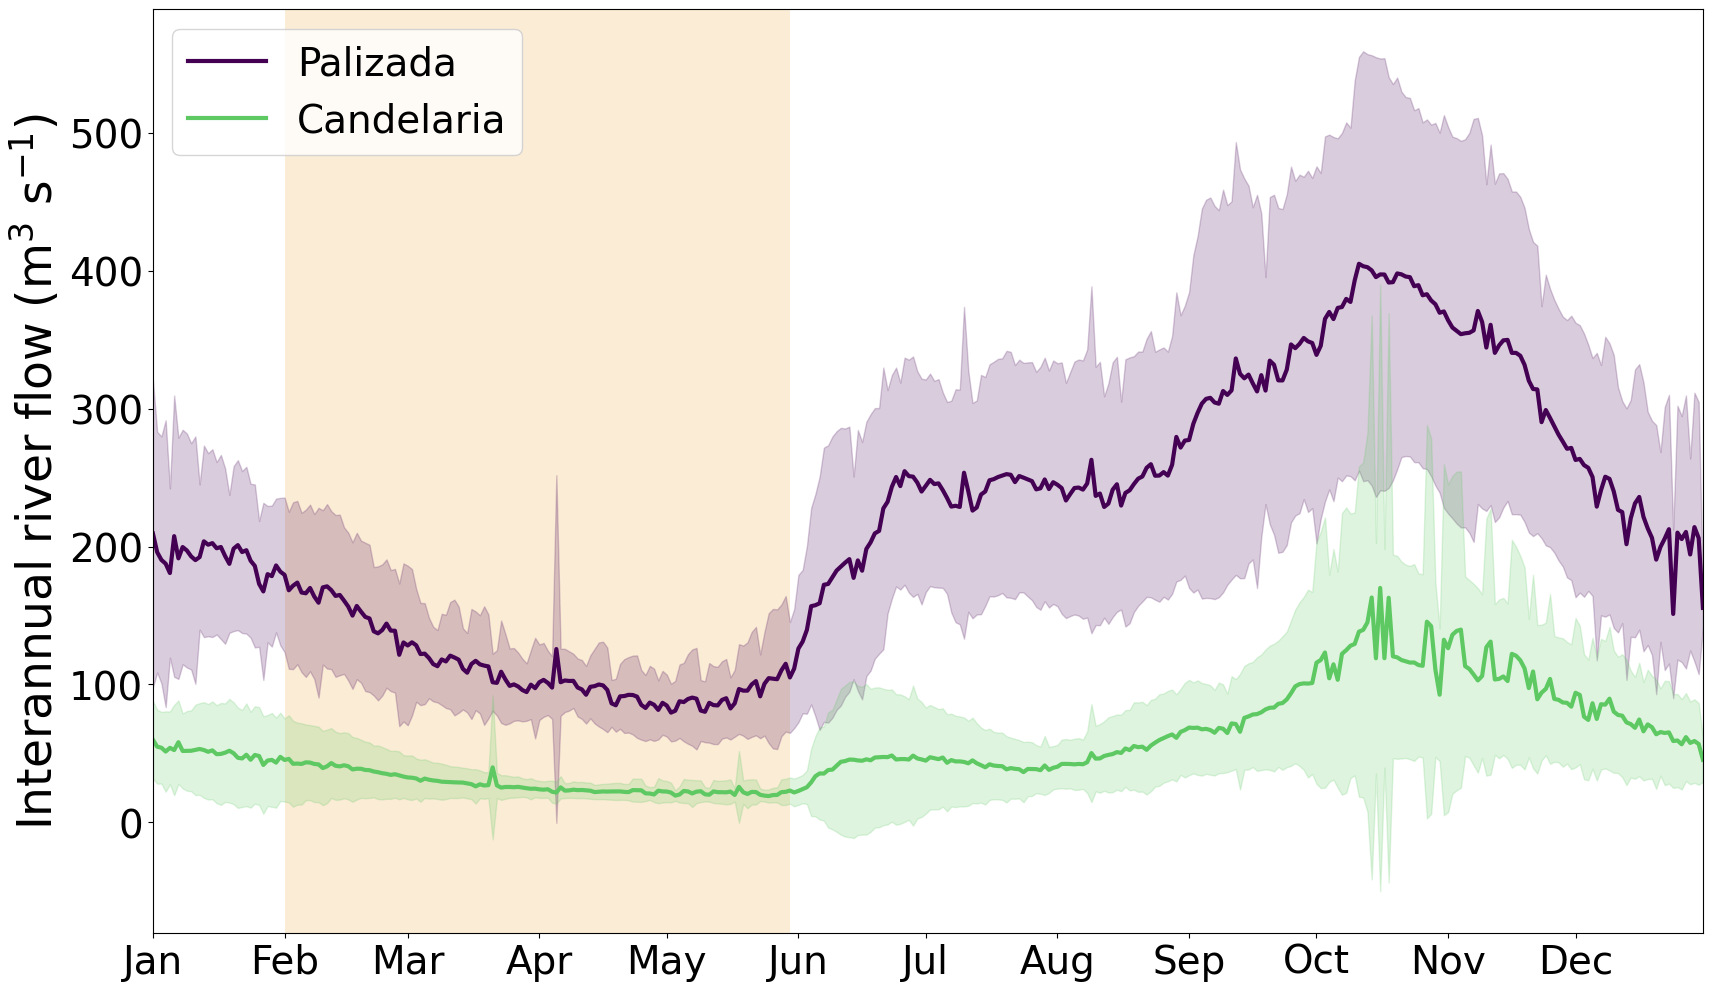

In [17]:
# Plot the river flow for each river

import matplotlib.patches as patches
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

plot_river_flow(year_2016, palizada_flow_average, palizada_flow_std, "#440154", 'Palizada')
plot_river_flow(year_2016, candelaria_flow_average, candelaria_flow_std, "#5ec962", 'Candelaria')

format_plot()

# Add a rectangle to highlight the dry season
plt.gca().add_patch(patches.Rectangle(
    (mdates.date2num(datetime(2016, 2, 1)), -100),
    mdates.date2num(datetime(2016, 5, 30)) - mdates.date2num(datetime(2016, 2, 1)),
    800,
    fill=True, 
    facecolor='#F4C27A', 
    edgecolor='none', 
    alpha=0.3, 
    zorder=-1
))


plt.savefig("../output_files/candelariaParizadaRiverFlowAV.pdf", transparent=True)
plt.show()

